In [43]:
# Imports 
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime


In [44]:
# Parameters
n_cities = 18

n_population = 50

mutation_rate = 0.3

In [45]:
cities_dict = {'London': [5, 55],
 'Moscow': [55, 24],
 'Barcelona': [35, 59],
 'Rome': [7, 86],
 'Paris': [91, 47],
 'Vienna': [67, 89],
 'Munich': [33, 74],
 'Istanbul': [85, 6],
 'Kyiv': [32, 82],
 'Bucharest': [28, 65],
 'Minsk': [81, 67],
 'Warsaw': [86, 90],
 'Budapest': [46, 68],
 'Milan': [5, 6],
 'Prague': [89, 88],
 'Sofia': [89, 97],
 'Birmingham': [35, 87],
 'Brussels': [50, 97]}
cities_dict
names_list = np.array(['London', 'Moscow', 'Barcelona', 'Rome', 'Paris', 'Vienna', 'Munich', 'Istanbul', 'Kyiv', 'Bucharest', 'Minsk', 'Warsaw', 'Budapest', 'Milan', 'Prague', 'Sofia', 'Birmingham', 'Brussels', 'Amsterdam'])

# 1. Create the first population set

In [46]:
np.random.seed(0)
# First step: Create the first population set
def genesis(city_list, n_population):
    
    population_set = []
    for i in range(n_population):
        #Randomly generating a new solution
        
        sol_i = city_list[np.random.choice(list(range(n_cities)), n_cities, replace=False)]
        population_set.append(sol_i)
    return np.array(population_set)

population_set = genesis(names_list, n_population)

# add 'Berlin' at the first and last
cities_dict['Berlin'] = [0,0]
a = np.array(['Berlin']*50)
a = np.reshape(a,(50,1))

population_set = np.hstack((a, population_set, a))
population_set

array([['Berlin', 'Moscow', 'Munich', 'Kyiv', 'Minsk', 'Prague', 'Paris',
        'Barcelona', 'Birmingham', 'Brussels', 'Bucharest', 'Istanbul',
        'Milan', 'Warsaw', 'Rome', 'London', 'Vienna', 'Sofia',
        'Budapest', 'Berlin'],
       ['Berlin', 'Warsaw', 'Budapest', 'Minsk', 'Barcelona',
        'Birmingham', 'Prague', 'London', 'Rome', 'Paris', 'Milan',
        'Bucharest', 'Vienna', 'Brussels', 'Kyiv', 'Sofia', 'Istanbul',
        'Munich', 'Moscow', 'Berlin'],
       ['Berlin', 'Brussels', 'Budapest', 'Warsaw', 'Vienna',
        'Barcelona', 'Kyiv', 'Munich', 'Rome', 'Birmingham', 'Paris',
        'Minsk', 'Sofia', 'Milan', 'Bucharest', 'Moscow', 'London',
        'Istanbul', 'Prague', 'Berlin'],
       ['Berlin', 'Warsaw', 'Milan', 'Rome', 'Istanbul', 'Birmingham',
        'Budapest', 'Barcelona', 'Bucharest', 'Minsk', 'Moscow', 'Sofia',
        'Kyiv', 'Munich', 'Prague', 'Vienna', 'Paris', 'Brussels',
        'London', 'Berlin'],
       ['Berlin', 'Sofia', 'Kyiv', '

# 2. Fitness Evaluation

In [47]:
# Function to compute the distance between two points
def compute_city_distance_coordinates(a,b):
    return np.sqrt(((a[0]-b[0])**2+(a[1]-b[1])**2))

def compute_city_distance_names(city_a, city_b, cities_dict):
    return compute_city_distance_coordinates(cities_dict[city_a], cities_dict[city_b])

In [48]:
def fitness_eval(city_list, cities_dict):
    total = 0
    for i in range(n_cities-1):
        a = city_list[i]
        b = city_list[i+1]
        total += compute_city_distance_names(a,b, cities_dict)
        
    return total


In [49]:
def get_all_fitnes(population_set, cities_dict):
    fitnes_list = np.zeros(n_population)

    #Looping over all solutions computing the fitness for each solution
    for i in  range(n_population):
        fitnes_list[i] = fitness_eval(population_set[i], cities_dict)

    return fitnes_list

fitnes_list = get_all_fitnes(population_set,cities_dict)
fitnes_list
fitnes_list.min()

740.9786832657732

# 3. Selection

In [50]:
def progenitor_selection(population_set,fitnes_list):
    total_fit = fitnes_list.sum()
    prob_list = fitnes_list/total_fit
    
    #Notice there is the chance that a progenitor. mates with oneself
    progenitor_list_a = np.random.choice(list(range(len(population_set))), len(population_set),p=prob_list, replace=True)
    progenitor_list_b = np.random.choice(list(range(len(population_set))), len(population_set),p=prob_list, replace=True)
    
    progenitor_list_a = population_set[progenitor_list_a]
    progenitor_list_b = population_set[progenitor_list_b]
    
    
    return np.array([progenitor_list_a,progenitor_list_b])


progenitor_list = progenitor_selection(population_set[:,1:-1],fitnes_list)
progenitor_list

array([[['Munich', 'Milan', 'Brussels', ..., 'Budapest', 'Rome',
         'Warsaw'],
        ['London', 'Bucharest', 'Budapest', ..., 'Milan', 'Munich',
         'Minsk'],
        ['Milan', 'Warsaw', 'Minsk', ..., 'Rome', 'Istanbul', 'Paris'],
        ...,
        ['Minsk', 'Munich', 'Kyiv', ..., 'Sofia', 'London', 'Rome'],
        ['Sofia', 'Kyiv', 'Minsk', ..., 'Munich', 'Rome', 'Bucharest'],
        ['Munich', 'Paris', 'Bucharest', ..., 'Vienna', 'Barcelona',
         'Moscow']],

       [['Moscow', 'Kyiv', 'Barcelona', ..., 'Munich', 'Rome',
         'Budapest'],
        ['Budapest', 'Brussels', 'Birmingham', ..., 'London', 'Kyiv',
         'Sofia'],
        ['Munich', 'Paris', 'Bucharest', ..., 'Birmingham', 'Kyiv',
         'Rome'],
        ...,
        ['Sofia', 'Istanbul', 'Budapest', ..., 'London', 'Warsaw',
         'Vienna'],
        ['Istanbul', 'Moscow', 'Sofia', ..., 'Budapest', 'Warsaw',
         'London'],
        ['Munich', 'Paris', 'Bucharest', ..., 'Birmingham', 'Kyi

# 4. crossover

In [51]:
# import random

# def mate_progenitors(prog_a, prog_b):
    
#     offspring = prog_a[0:5]

#     for city in prog_b:

#         if not city in offspring:
#             offspring = np.concatenate((offspring,[city]))

#     return offspring
            
    
    
# def mate_population(progenitor_list):
#     new_population_set = []
#     for i in range(progenitor_list.shape[1]):
#         prog_a, prog_b = progenitor_list[0][i], progenitor_list[1][i]
#         offspring = mate_progenitors(prog_a, prog_b)
#         new_population_set.append(offspring)
        
#     return new_population_set

# new_population_set = mate_population(progenitor_list)
# new_population_set[0]

gpt 답변

In [52]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.formula.api import ols

POPULATION_SIZE = 16	# 개체 집단의 크기
MUTATION_RATE = 0.2	# 돌연 변이 확률
SIZE = 9			# 하나의 염색체에서 유전자 개수		
df = pd.read_excel('distance.xlsx',header=1,usecols=range(1,10))
dist_table = df.values.tolist()
TARGET_VAL = 1018

# 최단 경로 : (0, 1, 2, 8, 7, 6, 5, 4, 3)
# 최단 거리 : 1018

class Chromosome:
    def __init__(self, g = []):
        self.genes = g		
        self.fitness = 0		
        if self.genes.__len__()==0:	
            temp_list = list(range(9))
            random.shuffle(temp_list)
            self.genes = temp_list.copy()
        
    def cal_fitness(self):		# 적합도를 계산
        global dist_table
        self.fitness = 0
        value = 0

        prev_node = self.genes[0]
        for i in range(1,9):
            node = self.genes[i]
            value += int(dist_table[prev_node][node])
            prev_node = node
        value += int(dist_table[self.genes[8]][self.genes[0]])

        self.fitness = TARGET_VAL * 2 - value if TARGET_VAL * 2 - value > 0 else 1
        return self.fitness

    def __str__(self):
        return self.genes.__str__()

def print_p(pop):
    i = 0
    for x in pop:
        print("염색체 #", i, "=", x, "적합도=", x.fitness)
        i += 1
    print("")

# 선택 연산
def select(pop):
    max_value  = sum([c.cal_fitness() for c in population])
    pick    = random.uniform(0, max_value)
    current = 0
    
    for c in pop:
        current += c.cal_fitness()
        if current > pick:
            return c

# 교차 연산
def crossover(pop):
    father = select(pop)
    mother = select(pop)
    length = random.randint(1, SIZE - 1)
    idx = random.randint(0, SIZE - length)

    t_child1 = mother.genes[idx:idx + length].copy()
    t_child2 = father.genes[idx:idx + length].copy()

    child1 = list(filter(lambda x: not x in t_child1,father.genes))
    child2 = list(filter(lambda x: not x in t_child2,mother.genes))

    child1 = child1[:idx] + t_child1 + child1[idx:]
    child2 = child2[:idx] + t_child2 + child2[idx:]

    return (child1, child2)
    
# 돌연변이 연산
def mutate(c):
    if random.random() < MUTATION_RATE:
        x, y = random.sample(list(range(0,9)),2)
        c.genes[y], c.genes[x] = c.genes[x], c.genes[y]

# 메인 프로그램
population = []
i=0
fitness_list = []

# 초기 염색체를 생성하여 객체 집단에 추가한다. 
while i<POPULATION_SIZE:
    population.append(Chromosome())
    i += 1

count=0
population.sort(key=lambda x: x.cal_fitness(),reverse=True)
print("세대 번호=", count)
print_p(population)
count=1

max_fitness = 0

while population[0].fitness < TARGET_VAL:
    if population[0].fitness > max_fitness:
        MUTATION_RATE = MUTATION_RATE * 0.9
        max_fitness = population[0].fitness
    new_pop = []

    # 선택과 교차 연산
    for _ in range(POPULATION_SIZE//2):
        c1, c2 = crossover(population)
        new_pop.append(Chromosome(c1))
        new_pop.append(Chromosome(c2))

    # 자식 세대가 부모 세대를 대체한다. 
    # 깊은 복사를 수행한다. 
    population = new_pop.copy()
    
    # 돌연변이 연산
    for c in population: mutate(c)

    # 출력을 위한 정렬
    population.sort(key=lambda x: x.cal_fitness(),reverse=True)
    fitness_list.append(population[0].fitness)
    print("세대 번호=", count)
    print_p(population)
    count += 1
    if count > 50000 : break

x, y = range(len(fitness_list)),fitness_list
fit_line = np.polyfit(x,y,1)
x_minmax = np.array([min(x), max(x)])
fit_y = x_minmax * fit_line[0] + fit_line[1]

plt.plot(fitness_list,label='fitness')
plt.plot(x_minmax, fit_y, color = 'red',label='regression')
plt.xlabel('generation number')
plt.ylabel('fitness')
plt.legend()
plt.show()

array([['Munich', 'Milan', 'Barcelona', ..., 'Budapest', 'Rome',
        'Warsaw'],
       ['Moscow', 'Kyiv', 'Brussels', ..., 'Munich', 'Rome', 'Budapest'],
       ['London', 'Bucharest', 'Budapest', ..., 'Milan', 'Munich',
        'Minsk'],
       ...,
       ['Istanbul', 'Moscow', 'Sofia', ..., 'Budapest', 'Warsaw',
        'London'],
       ['Munich', 'Paris', 'Bucharest', ..., 'Vienna', 'Barcelona',
        'Moscow'],
       ['Munich', 'Paris', 'Bucharest', ..., 'Birmingham', 'Kyiv',
        'Rome']], dtype='<U10')

# 5.  Mutation

In [53]:
def mutate_offspring(offspring):
    for q in range(int(n_cities*mutation_rate)):
        a = np.random.randint(0,n_cities)
        b = np.random.randint(0,n_cities)

        offspring[a], offspring[b] = offspring[b], offspring[a]

    return offspring
    
    
def mutate_population(new_population_set):
    mutated_pop = []
    for offspring in new_population_set:
        mutated_pop.append(mutate_offspring(offspring))
    return mutated_pop

mutated_pop = mutate_population(new_population_set)
mutated_pop[0]

array(['Munich', 'Kyiv', 'Brussels', 'Moscow', 'Vienna', 'Budapest',
       'Paris', 'London', 'Istanbul', 'Prague', 'Warsaw', 'Minsk',
       'Bucharest', 'Birmingham', 'Barcelona', 'Milan', 'Sofia', 'Rome'],
      dtype='<U10')

# 6. Next generation
#### it will take 10000 iterations.

In [54]:
best_solution = [-1,np.inf,np.array([])]
for i in range(10000):
    if (i%100==0): 
        print(i, fitnes_list.min(), fitnes_list.mean(), datetime.now().strftime("%d/%m/%y %H:%M"))
        
    cities_dict['Berlin'] = [0,0]
    a = np.array(['Berlin']*50)
    a = np.reshape(a,(50,1))
    mutated_pop = np.hstack((a, mutated_pop, a))
        
        
    fitnes_list = get_all_fitnes(mutated_pop,cities_dict)
    
    #Saving the best solution
    if fitnes_list.min() < best_solution[1]:
        best_solution[0] = i
        best_solution[1] = fitnes_list.min()
        best_solution[2] = np.array(mutated_pop)[fitnes_list.min() == fitnes_list]
    
    progenitor_list = progenitor_selection(population_set[:,1:-1],fitnes_list)
    new_population_set = mate_population(progenitor_list)
    
    mutated_pop = mutate_population(new_population_set)

0 740.9786832657732 931.669582804378 14/04/23 22:47
100 705.6597922276869 944.058269046086 14/04/23 22:47
200 712.5521216271777 935.0279042637533 14/04/23 22:47
300 757.7663001877596 968.9845336862304 14/04/23 22:47
400 692.9222651817449 941.0386545344049 14/04/23 22:47
500 718.6377300217544 930.9346259931626 14/04/23 22:47
600 755.5386484506643 939.6821671739042 14/04/23 22:47
700 752.4393274052035 955.1626230421998 14/04/23 22:48
800 737.5765189556914 958.5042823560517 14/04/23 22:48
900 704.4447030342831 915.2786749692582 14/04/23 22:48
1000 771.8359371889538 947.6599569248025 14/04/23 22:48
1100 746.0638068203618 929.6376814911815 14/04/23 22:48
1200 725.0225760776955 924.3400874237346 14/04/23 22:48
1300 743.7675970502145 930.90122760783 14/04/23 22:48
1400 699.5612876341611 913.7062216820179 14/04/23 22:48
1500 728.837506264115 953.3181514454551 14/04/23 22:48
1600 699.7869305790325 946.3190100843062 14/04/23 22:48
1700 592.2377866399319 940.1550506374448 14/04/23 22:48
1800 751.

In [55]:
best_solution

[1994,
 489.73450875873374,
 array([['Berlin', 'Milan', 'Moscow', 'Rome', 'Bucharest', 'Munich',
         'Barcelona', 'London', 'Budapest', 'Birmingham', 'Brussels',
         'Warsaw', 'Prague', 'Sofia', 'Vienna', 'Kyiv', 'Minsk', 'Paris',
         'Istanbul', 'Berlin']], dtype='<U10')]

In [56]:
best = []
for i in range(20):
    best.append(cities_dict[best_solution[2][0][i]])
    

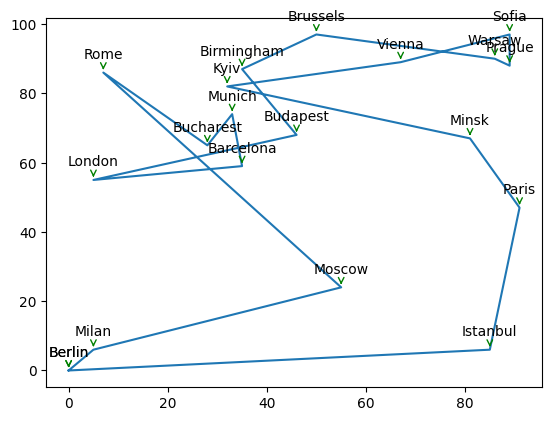

In [57]:
plt.plot(np.array(best)[:,0], np.array(best)[:,1])

#joins the x and y values
for x,y,z in zip(np.array(best)[:,0], np.array(best)[:,1], best_solution[2][0]):

    label = "{}".format(z)

    plt.annotate(label, # this is the value which we want to label (text)
                 (x,y), # x and y is the points location where we have to label
                 textcoords="offset points",
                 xytext=(0,10), # this for the distance between the points
                 # and the text label
                 ha='center',
                 arrowprops=dict(arrowstyle="->", color='green'))

plt.show()

In [58]:
population_set[0]

array(['Berlin', 'Moscow', 'Munich', 'Kyiv', 'Minsk', 'Prague', 'Paris',
       'Barcelona', 'Birmingham', 'Brussels', 'Bucharest', 'Istanbul',
       'Milan', 'Warsaw', 'Rome', 'London', 'Vienna', 'Sofia', 'Budapest',
       'Berlin'], dtype='<U10')

In [59]:
init = []
for i in range(20):
    init.append(cities_dict[population_set[0][i]])
  

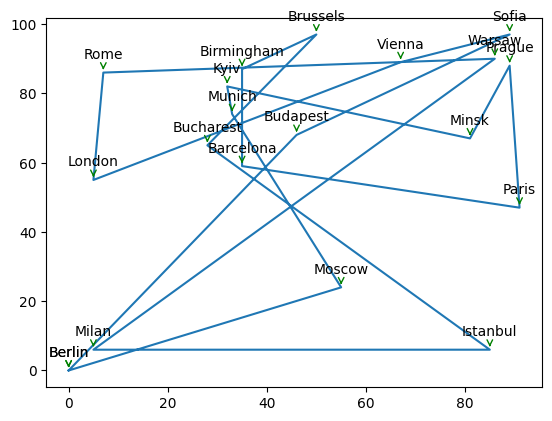

In [60]:
plt.plot(np.array(init)[:,0], np.array(init)[:,1])

#joins the x and y values
for x,y,z in zip(np.array(init)[:,0], np.array(init)[:,1], population_set[0]):

    label = "{}".format(z)

    plt.annotate(label, # this is the value which we want to label (text)
                 (x,y), # x and y is the points location where we have to label
                 textcoords="offset points",
                 xytext=(0,10), # this for the distance between the points
                 # and the text label
                 ha='center',
                 arrowprops=dict(arrowstyle="->", color='green'))

plt.show()